# Weighted Maxcut: Classical Computer v.s. D-Wave v.s. Qiskit

In [1]:
# IMPORTS
from GraphTools import *
from matplotlib import pyplot as plt

In [2]:
NODE_RANGE = range(3, 16) # Determine what graph sizes to test the Maxcut solutions on

def plot_time_growth(node_range, time_data, units, log_scale=False):
    """Plot the growth in time taken to solve the Max Cut problem as the number of nodes increases"""
    x = node_range
    y = time_data
    
    plt.xlabel("Number of Nodes")
    plt.ylabel(f"Solve Time ({units})")
    
    if log_scale:
        plt.yscale("log")
        print("Using logarithmic scale")
    
    plt.scatter(x,y)

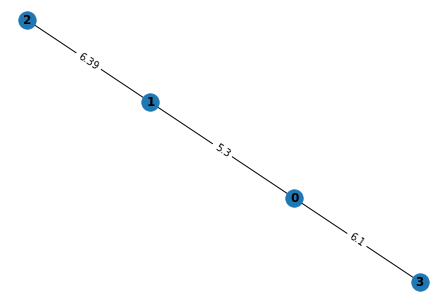

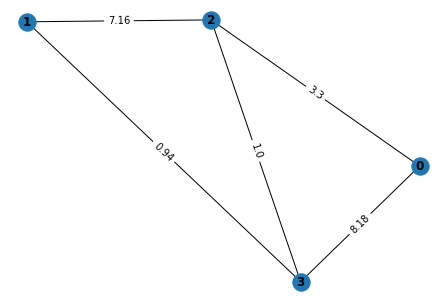

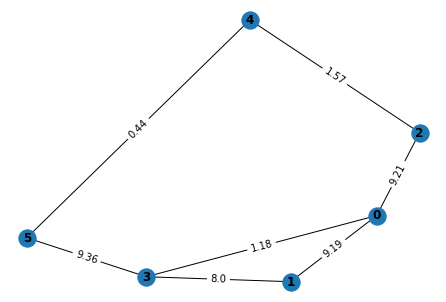

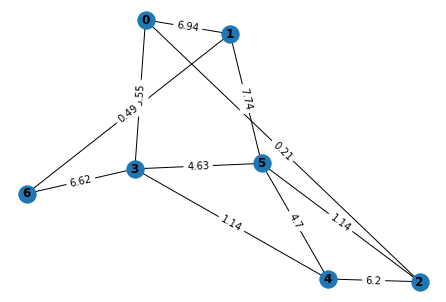

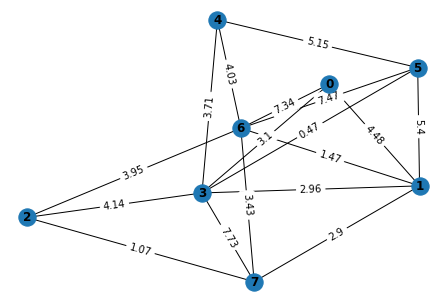

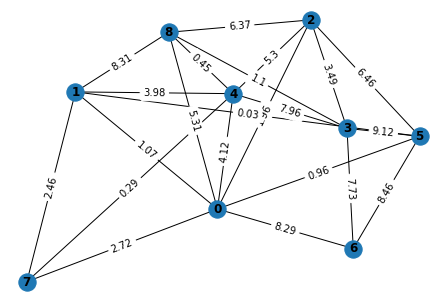

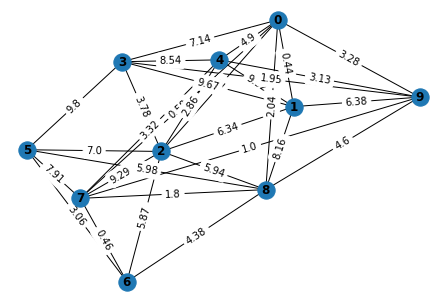

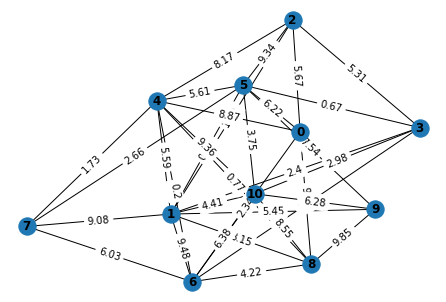

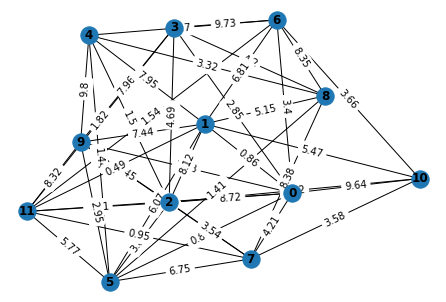

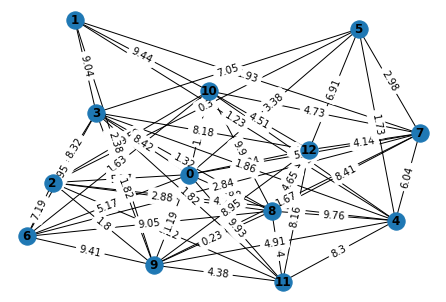

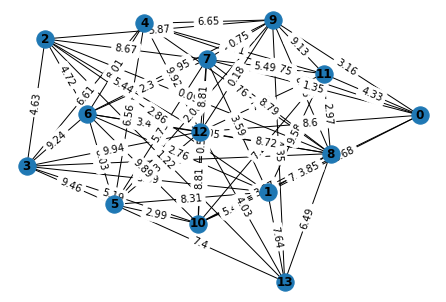

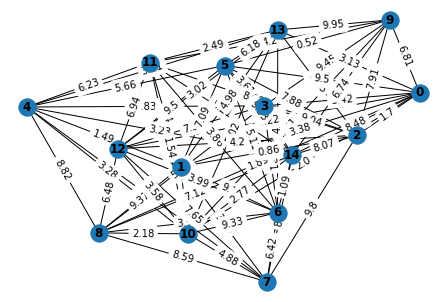

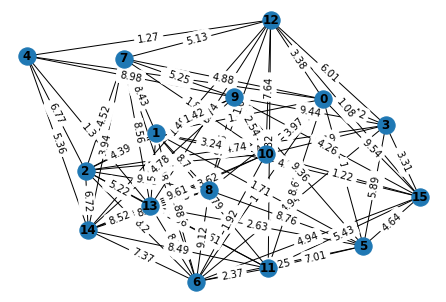

In [3]:
# Generate Graphs
graphs = []
positions = [] # Save the positions so that the graphs are drawn exactly the same way each time
for n in NODE_RANGE:
    G = generate_random_connected_graph(n, 10, math.floor(n*(n-1)/2))
    graphs.append(G)
    positions.append(nx.spring_layout(G))
    
for graph, pos in zip(graphs, positions):
    plt.figure()
    graph.draw_original(pos)
    

In [4]:
for graph in graphs:
    print(len(list(graph.nodes)),len(list(graph.edges)))

4 3
4 5
6 7
7 11
8 17
9 22
10 31
11 34
12 44
13 54
14 63
15 72
16 78


## Classical Solution
Find the maximum cut for each graph classically by trying each possible configuration. The time complexity should be $O(2^n)$

In [5]:
# Solve Max Cut Classically
solutions = []
for graph in graphs:
    solutions.append(graph.solve_maxcut_classical())

Solution: 0101, Cut Value: -17.79
Solution: 0011, Cut Value: -19.580000000000002
Solution: 011001, Cut Value: -37.769999999999996
Solution: 0101100, Cut Value: -42.870000000000005
Solution: 01010010, Cut Value: -58.15
Solution: 000011111, Cut Value: -80.22
Solution: 0011100011, Cut Value: -111.47
Solution: 00011110100, Cut Value: -134.20999999999998
Solution: 001001101110, Cut Value: -165.48999999999998
Solution: 0001010111110, Cut Value: -198.48999999999995
Solution: 01001001011010, Cut Value: -238.31999999999996
Solution: 011010100100101, Cut Value: -284.11
Solution: 0001100110110101, Cut Value: -296.77


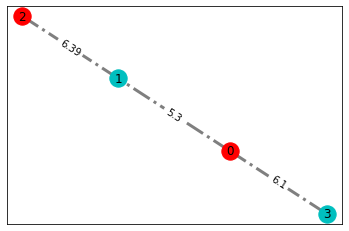

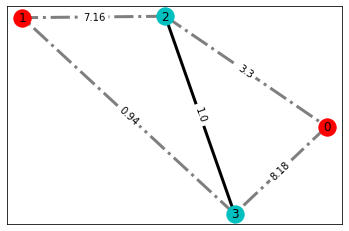

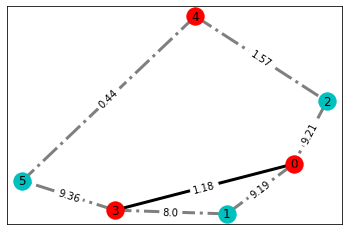

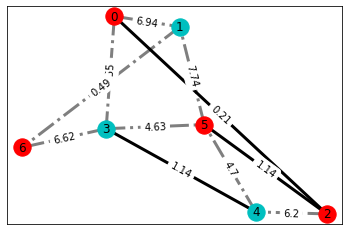

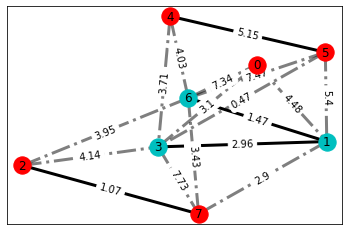

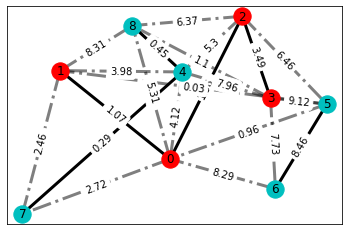

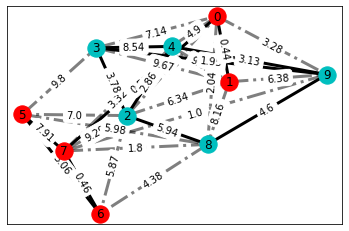

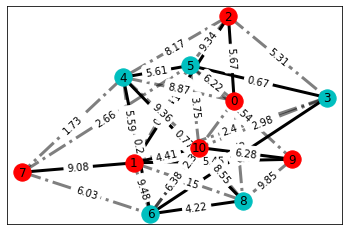

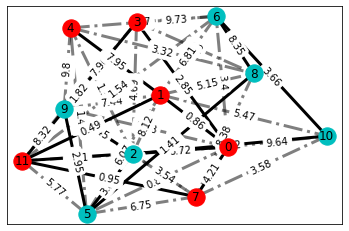

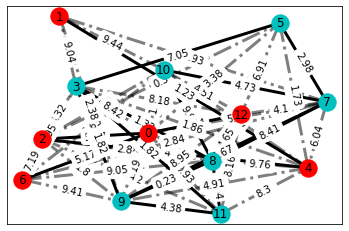

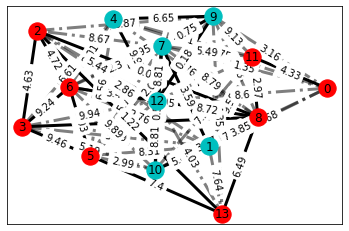

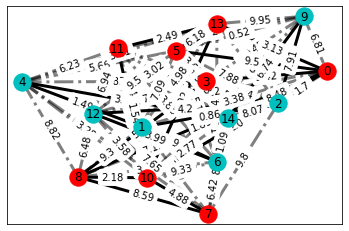

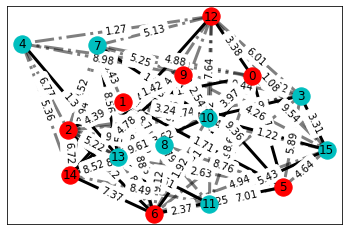

In [6]:
# Display solutions
for graph, pos, solution in zip(graphs, positions, solutions):
    print(f"Solution: {solution}, Cut Value: {graph.get_cut_size(solution)}")
    plt.figure()
    graph.draw_cut(pos, solution)

In [7]:
# Solve again, but this time keeping track of runtimes.
classical_times = []
for graph in graphs:
    t = %timeit -o graph.solve_maxcut_classical()
    classical_times.append(t)

285 µs ± 46.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
433 µs ± 123 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.46 ms ± 166 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.22 ms ± 985 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.9 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
29.5 ms ± 2.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
76.7 ms ± 11.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
163 ms ± 13.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
412 ms ± 89 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
821 ms ± 209 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.81 s ± 246 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.92 s ± 410 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.11 s ± 479 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
# Print average solve time for each number of nodes
for t in classical_times:
    print(str(t.average) + " seconds")

0.00028538463757142856 seconds
0.0004333022632857149 seconds
0.001464991704857142 seconds
0.004220638317142849 seconds
0.011903328188571415 seconds
0.029528683514285246 seconds
0.07665578247142914 seconds
0.1625985930285716 seconds
0.4119746001428593 seconds
0.8213996039999968 seconds
1.8139365547142827 seconds
4.92364293257143 seconds
9.109355019000008 seconds


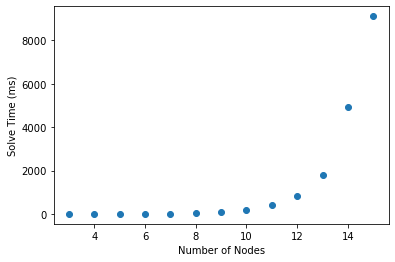

In [9]:
plot_time_growth(NODE_RANGE, [t.average * 1000 for t in classical_times], "ms")

Using logarithmic scale


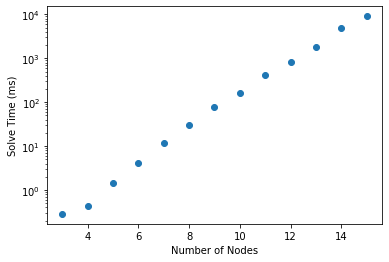

In [10]:
# Plot the same data using a logarithmic scale
plot_time_growth(NODE_RANGE, [t.average * 1000 for t in classical_times], "ms", log_scale=True)

## D-Wave Solution
Find the maximum cut with D-Wave's Quantum Computer.

In [11]:
# Solve Max Cut 
dwave_solutions = []
dwave_solve_times = []
for graph in graphs:
    sol, runtime = graph.solve_maxcut_dwave(return_runtime = True)
    dwave_solutions.append(sol)
    dwave_solve_times.append(runtime)

Solution: 1010, Cut Value: -17.79
Solution: 1100, Cut Value: -19.580000000000002
Solution: 011001, Cut Value: -37.769999999999996
Solution: 1010011, Cut Value: -42.870000000000005
Solution: 10101101, Cut Value: -58.15
Solution: 000011111, Cut Value: -80.22
Solution: 0011100011, Cut Value: -111.47
Solution: 11100001011, Cut Value: -134.20999999999998
Solution: 110110010001, Cut Value: -165.48999999999998
Solution: 0001010111110, Cut Value: -198.48999999999995
Solution: 10110110100101, Cut Value: -238.31999999999996
Solution: 000101011011010, Cut Value: -283.46000000000004
Solution: 1110011001001010, Cut Value: -296.77


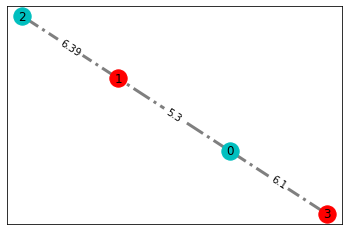

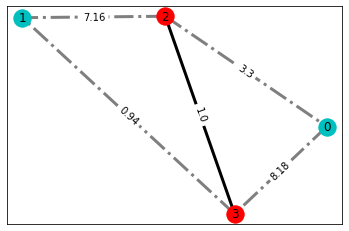

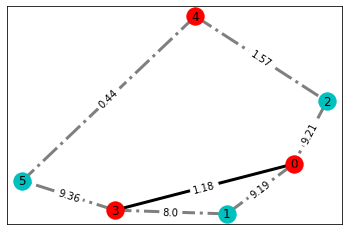

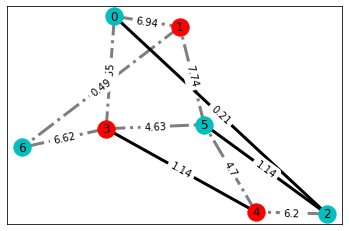

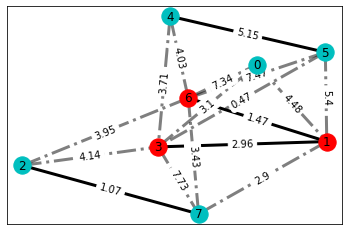

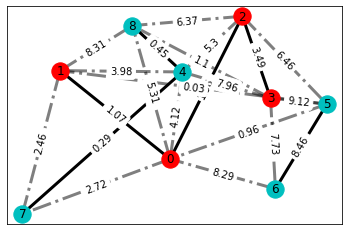

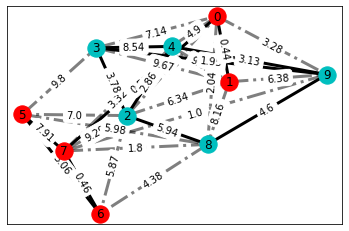

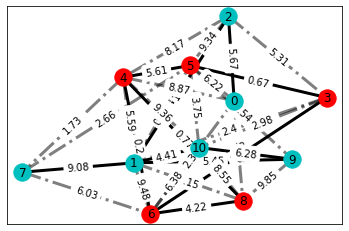

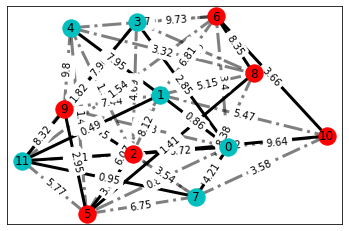

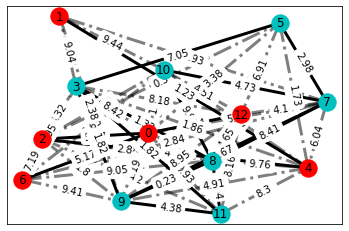

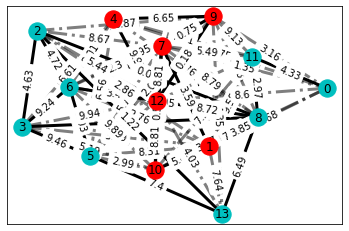

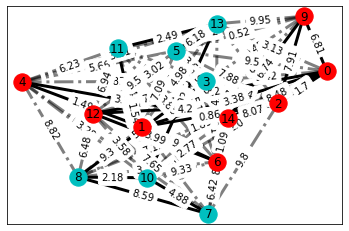

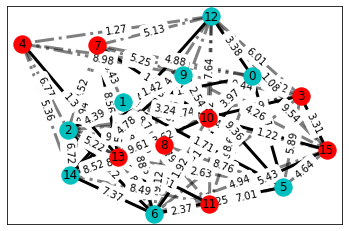

In [12]:
# Display Results
for graph, pos, solution in zip(graphs, positions, dwave_solutions):
    print(f"Solution: {solution}, Cut Value: {graph.get_cut_size(solution)}")
    plt.figure()
    graph.draw_cut(pos, solution)

In [13]:
# Display Runtimes
for runtime in dwave_solve_times:
    print(runtime)

28018
27966
28137
28057
28079
28189
28325
28184
28207
28111
28195
28235
28303


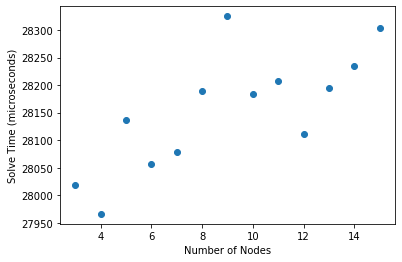

In [14]:
# Plot runtimes
plot_time_growth(NODE_RANGE, dwave_solve_times, "microseconds")

In [15]:
# Compare accuracy of solution
print("Ratios between D-Wave solutions and actual solutions (to compare accuracy):")
for graph, solution, dwave_solution in zip(graphs, solutions, dwave_solutions):
    print(graph.get_cut_size(dwave_solution) / graph.get_cut_size(solution))

Ratios between D-Wave solutions and actual solutions (to compare accuracy):
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9977121537432685
1.0


## Qiskit Solution

In [16]:
P = 2 # Choose number of iterations to apply cost unitary

# Solve Max Cut with Qiskit
qiskit_solutions = []
for graph in graphs:
    qiskit_solutions.append(graph.solve_maxcut_qiskit(P))

Solution: 0101, Cut Value: -17.79
Solution: 1010, Cut Value: -16.34
Solution: 010001, Cut Value: -26.99
Solution: 1010101, Cut Value: -26.580000000000002
Solution: 11111001, Cut Value: -31.239999999999995
Solution: 010011000, Cut Value: -54.96
Solution: 1000001100, Cut Value: -59.63
Solution: 01001010001, Cut Value: -89.89999999999999
Solution: 100111111000, Cut Value: -110.67000000000002
Solution: 1111100101001, Cut Value: -158.69999999999993
Solution: 01101001011110, Cut Value: -187.13
Solution: 011010111000000, Cut Value: -186.74000000000004
Solution: 1000100111001000, Cut Value: -184.49999999999994


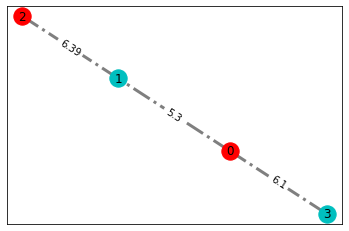

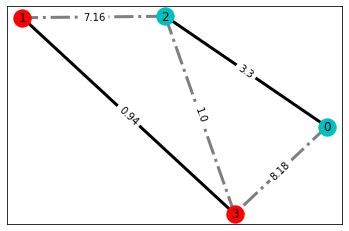

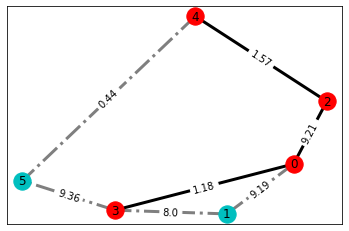

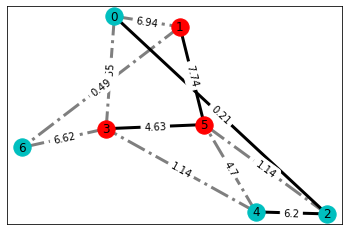

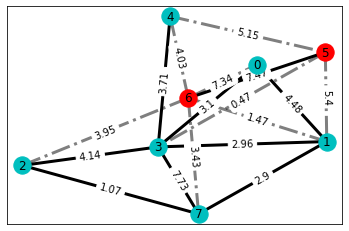

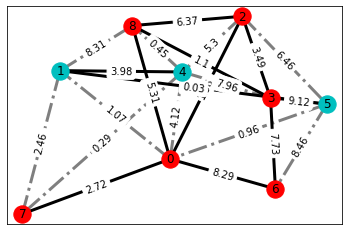

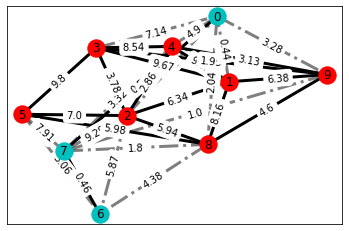

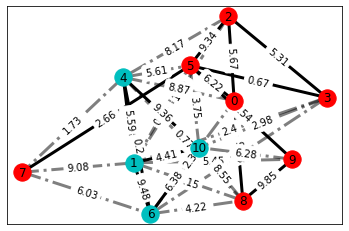

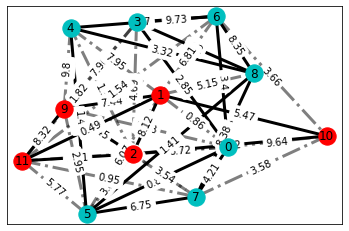

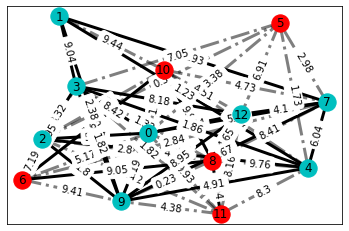

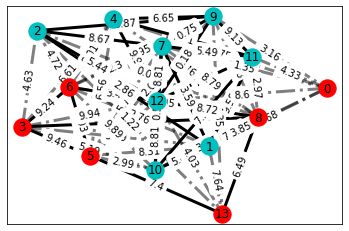

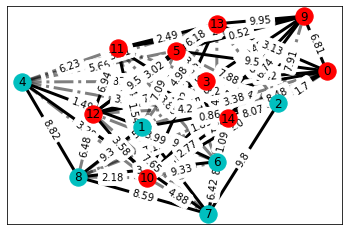

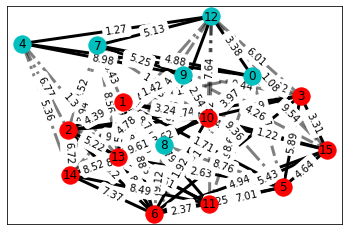

In [17]:
# Display Results
for graph, pos, solution in zip(graphs, positions, qiskit_solutions):
    print(f"Solution: {solution}, Cut Value: {graph.get_cut_size(solution)}")
    plt.figure()
    graph.draw_cut(pos, solution)

In [18]:
# Compare accuracy of solution
print("Ratios between Qiskit solutions and actual solutions (to compare accuracy):")
for graph, solution, qiskit_solution in zip(graphs, solutions, qiskit_solutions):
    print(graph.get_cut_size(qiskit_solution) / graph.get_cut_size(solution))

Ratios between Qiskit solutions and actual solutions (to compare accuracy):
1.0
0.8345250255362614
0.7145882975906804
0.6200139958012596
0.537231298366294
0.6851159311892296
0.5349421368978201
0.6698457641010357
0.6687413136745425
0.7995365005793741
0.7852047667002351
0.6572806307416142
0.6216935674091045


In [19]:
# Check Runtimes
qiskit_times = []
for graph in graphs:
    t = %timeit -o graph.solve_maxcut_qiskit(P)
    qiskit_times.append(t)

1.17 s ± 190 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.47 s ± 219 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.93 s ± 207 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.74 s ± 554 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.01 s ± 2.33 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.85 s ± 425 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.61 s ± 524 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.7 s ± 769 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.9 s ± 1.91 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
14.2 s ± 5.67 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
12.7 s ± 2.48 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
18.4 s ± 2.14 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
21.5 s ± 1.6 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
# Print average runtimes
for t in qiskit_times:
    print(str(t.average) + " seconds")

1.1722654934285646 seconds
1.4666387975714283 seconds
1.9346370382857165 seconds
2.7374410382857053 seconds
4.0051045705714206 seconds
3.8508297690000046 seconds
5.6081524957142745 seconds
6.695824498142883 seconds
9.898255440571445 seconds
14.249964552428553 seconds
12.748444792428554 seconds
18.400857535857117 seconds
21.49561748157144 seconds


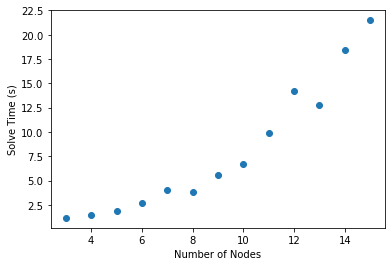

In [21]:
# Plot data
plot_time_growth(NODE_RANGE, [t.average for t in qiskit_times], "s")

Using logarithmic scale


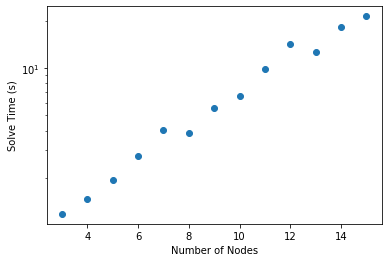

In [22]:
# Plot the same data using a logarithmic scale
plot_time_growth(NODE_RANGE, [t.average for t in qiskit_times], "s", log_scale=True)